### **Университет Правительства Москвы** ###
# Математика для гуманитариев #

## **Практическое занятие №1** ##

## Основные сюжеты математики ##

### Шамин Роман Вячеславович ###

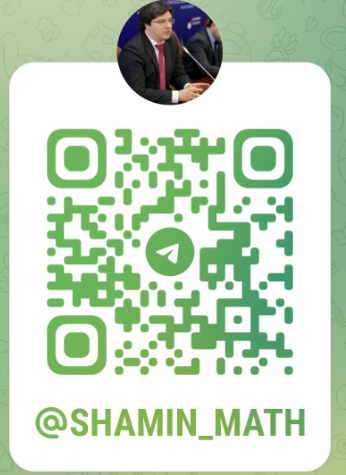

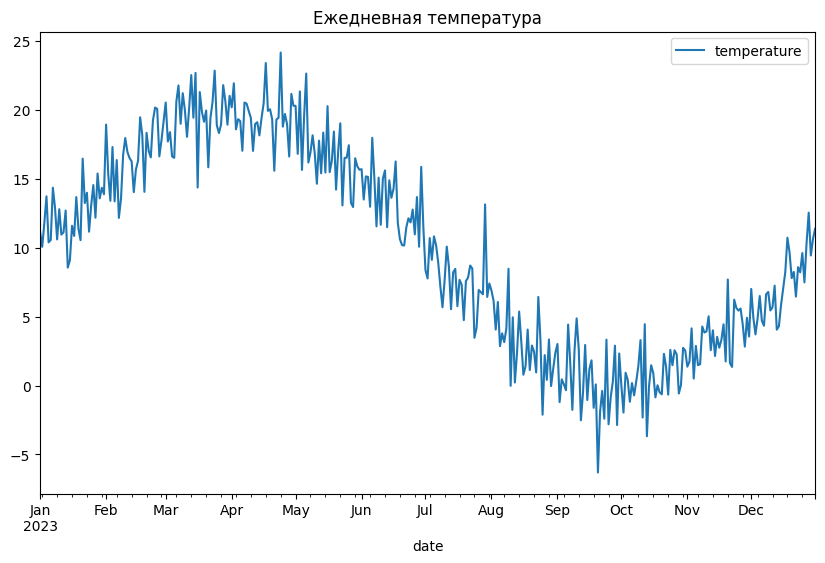

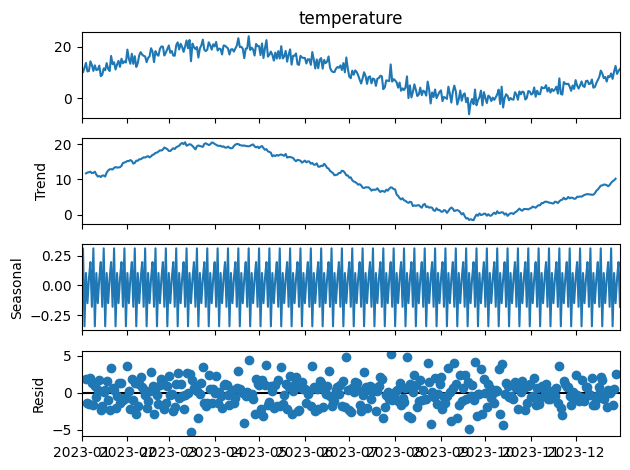

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Загрузка данных
data = pd.read_csv('temperature_data.csv', parse_dates=['date'], index_col='date')

# Построение графика временного ряда
data.plot(figsize=(10, 6))
plt.title("Ежедневная температура")
plt.show()

# Декомпозиция временного ряда
decomposition = seasonal_decompose(data['temperature'], model='additive')
decomposition.plot()
plt.show()



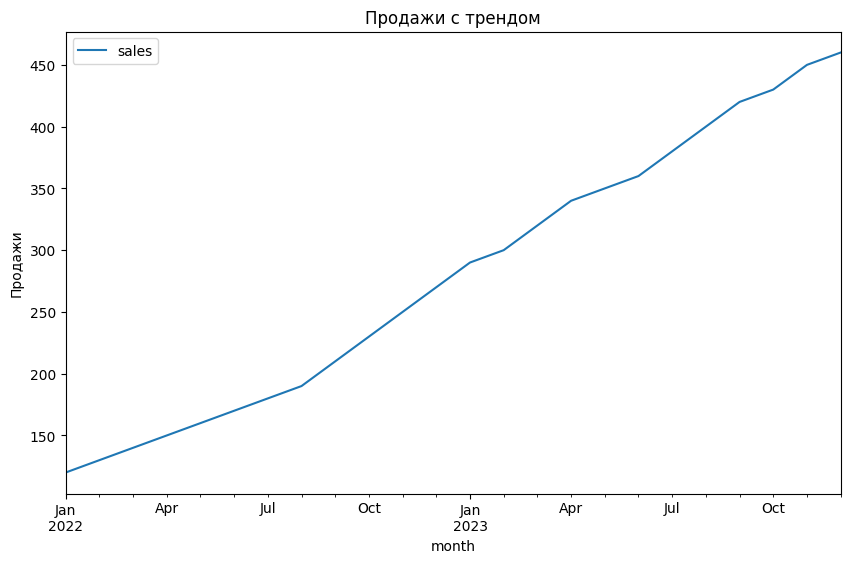

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
data = pd.read_csv('sales_data.csv', parse_dates=['month'], index_col='month')

# Построение графика временного ряда
data.plot(figsize=(10, 6), title="Продажи с трендом")
plt.ylabel("Продажи")
plt.show()



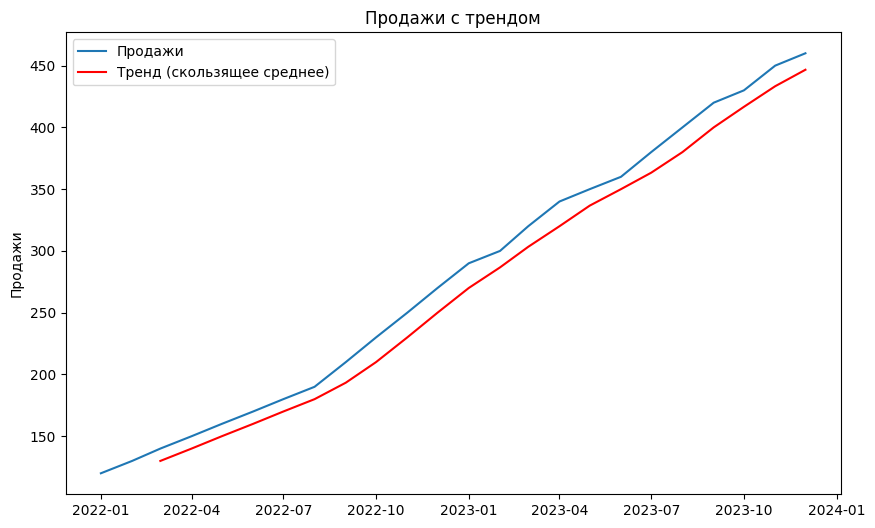

In [33]:
# Вычисление 3-месячного скользящего среднего
data['rolling_mean'] = data['sales'].rolling(window=3).mean()

# Построение графика с трендовой линией
plt.figure(figsize=(10, 6))
plt.plot(data['sales'], label='Продажи')
plt.plot(data['rolling_mean'], label='Тренд (скользящее среднее)', color='red')
plt.title('Продажи с трендом')
plt.ylabel('Продажи')
plt.legend()
plt.show()


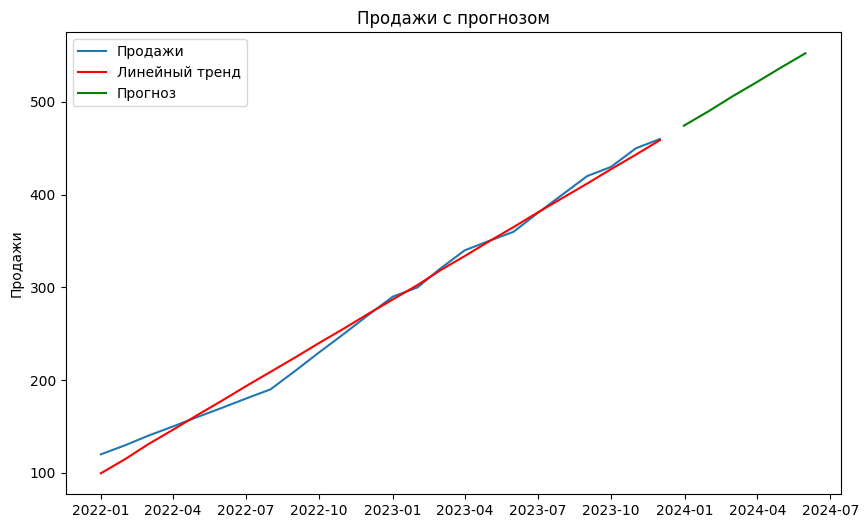

In [34]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Создание временного ряда для модели
data['time_index'] = np.arange(len(data))

# Линейная регрессия для определения тренда
model = LinearRegression()
X = data['time_index'].values.reshape(-1, 1)
y = data['sales']
model.fit(X, y)

# Прогноз на будущее (на следующие 6 месяцев)
future_index = np.arange(len(data), len(data) + 6).reshape(-1, 1)
future_sales = model.predict(future_index)

# Построение графика с прогнозом
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['sales'], label='Продажи')
plt.plot(data.index, model.predict(X), label='Линейный тренд', color='red')
plt.plot(pd.date_range(start=data.index[-1], periods=6, freq='ME'), future_sales, label='Прогноз', color='green')
plt.title('Продажи с прогнозом')
plt.ylabel('Продажи')
plt.legend()
plt.show()


Давайте научимся рисовать графики на Python.

*Это просто!*

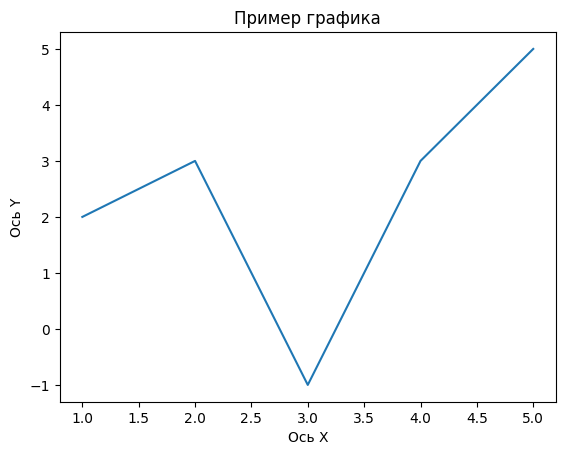

In [35]:
import matplotlib.pyplot as plt

# Данные для графика
x = [1, 2, 3, 4, 5]
y = [2, 3, -1, 3, 5]

# Создание графика
plt.plot(x, y)

# Добавление заголовка и меток осей
plt.title('Пример графика')
plt.xlabel('Ось X')
plt.ylabel('Ось Y')

# Показать график
plt.show()


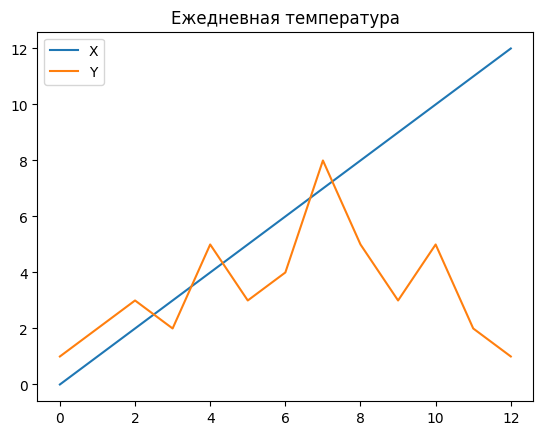

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
data = pd.read_csv('data.csv')

# Построение графика временного ряда
data.plot()
plt.title("Ежедневная температура")
plt.show()

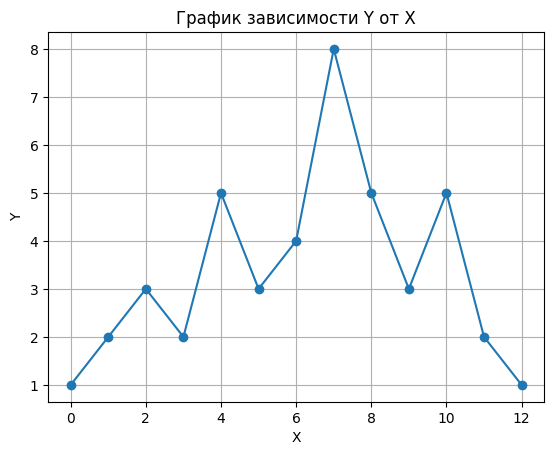

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных из CSV-файла
data = pd.read_csv('data.csv')

# Предполагается, что столбцы называются 'X' и 'Y'
x = data['X']
y = data['Y']

# Построение графика
plt.plot(x, y, marker='o')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('График зависимости Y от X')
plt.grid(True)
plt.show()


## Оптимизация фондового пакета ##

Модель Марковица, также известная как **модель оптимизации портфеля** или **теория портфеля Марковица**, является фундаментальной концепцией в современной финансовой теории, предложенной Гарри Марковицем в 1952 году. Она помогает инвесторам формировать оптимальный портфель, исходя из соотношения риска и доходности.

Основная идея модели заключается в том, что инвестор может минимизировать риск портфеля, распределяя капитал между активами таким образом, чтобы добиться оптимального соотношения риска и ожидаемой доходности. Основные концепции модели включают:

### Основные концепции модели Марковица:

1. **Ожидаемая доходность портфеля**:
   - Это средневзвешенная доходность активов, входящих в портфель. Инвестор стремится к максимальной ожидаемой доходности при минимальном риске.
   
   Формула ожидаемой доходности портфеля:
   $$
   E(R_p) = \sum_{i=1}^{n} w_i \cdot E(R_i)
   $$
   где:
   - $E(R_p)$ — ожидаемая доходность портфеля,
   - $w_i$ — вес актива $i$ в портфеле,
   - $E(R_i)$ — ожидаемая доходность актива $i$,
   - $n$ — количество активов в портфеле.

2. **Риск портфеля (волатильность)**:
   - Риск измеряется стандартным отклонением доходности портфеля и зависит от ковариации доходностей активов.
   
   Формула для расчета волатильности (стандартного отклонения) портфеля:
   $$
   \sigma_p^2 = \sum_{i=1}^{n} \sum_{j=1}^{n} w_i w_j \cdot \text{Cov}(R_i, R_j)
   $$
   где:
   - $\sigma_p^2$ — дисперсия (риск) портфеля,
   - $\text{Cov}(R_i, R_j)$ — ковариация доходностей активов $i$ и $j$.

3. **Ковариация**:
   - Ковариация между двумя активами показывает, как изменяются их доходности относительно друг друга. Положительная ковариация означает, что активы двигаются в одном направлении, отрицательная — в противоположных.
   
   Формула ковариации:
   $$
   \text{Cov}(R_i, R_j) = \mathbb{E}[(R_i - \mathbb{E}(R_i))(R_j - \mathbb{E}(R_j))]
   $$

4. **Диверсификация**:
   - Главный вывод модели Марковица — это принцип диверсификации, согласно которому можно снизить общий риск портфеля, комбинируя активы с разной доходностью и риском. Важен не только риск отдельных активов, но и то, как они коррелируют друг с другом.

5. **Границы эффективности (Efficient Frontier)**:
   - Это множество портфелей, которые обеспечивают наибольшую доходность при заданном уровне риска или минимальный риск при заданной доходности. Портфель считается эффективным, если он лежит на этой границе. Все портфели, лежащие ниже границы эффективности, являются неэффективными, так как предлагают либо меньшую доходность при том же уровне риска, либо больший риск при той же доходности.

### Шаги построения оптимального портфеля:

1. **Оценка доходности и риска активов**:
   - Вычисление средней доходности каждого актива на основе исторических данных.
   - Определение риска каждого актива (стандартное отклонение его доходностей).
   - Вычисление ковариаций доходностей между активами.

2. **Определение весов активов в портфеле**:
   - Веса определяют долю капитала, инвестированного в каждый актив. Эти веса подбираются так, чтобы минимизировать риск при заданной ожидаемой доходности или максимизировать доходность при заданном уровне риска.

3. **Оптимизация портфеля**:
   - Модель Марковица использует математические методы оптимизации (например, квадратичное программирование) для минимизации риска портфеля при заданной доходности или максимизации доходности при заданном уровне риска.

4. **Результат: граница эффективности**:
   - После оптимизации получается набор портфелей, которые составляют границу эффективности. Портфель на этой границе имеет наилучшее соотношение риска и доходности.

### Пример:
Допустим, инвестор выбирает между двумя акциями: A и B. Акция A имеет ожидаемую доходность 10% и риск (стандартное отклонение) 15%, а акция B — ожидаемую доходность 12% и риск 20%. Если они не идеально коррелируют (корреляция меньше 1), то, комбинируя их в портфеле, инвестор может достичь более низкого риска, чем у каждой акции в отдельности, сохраняя при этом высокую доходность.

### Важные предположения модели:
1. Инвесторы рациональны и избегают риска (они предпочитают более низкий риск при той же доходности).
2. Все активы имеют нормальное распределение доходности.
3. Рынки эффективны, и информация доступна всем одновременно.
4. Нет транзакционных издержек и налогов.

### Ограничения модели Марковица:
1. **Предположение о нормальном распределении доходностей** может быть ошибочным, так как на рынках часто наблюдаются более сложные распределения.
2. Модель **не учитывает транзакционные издержки** и **налоговые последствия**.
3. **Историческая волатильность и доходность** не всегда могут точно предсказать будущее.

### Заключение:
Модель Марковица — это основополагающий подход к управлению инвестициями, который акцентирует внимание на диверсификации и балансе между риском и доходностью. Она дает инвесторам инструмент для создания эффективных портфелей, однако в реальных условиях необходимо учитывать её ограничения и адаптировать подходы к современным условиям рынка.

Оптимальные веса активов в портфеле: [0.41376159 0.31729338 0.26894503]
Ожидаемая доходность портфеля: 0.14999999997828525
Риск портфеля (волатильность): 0.03459635885145088


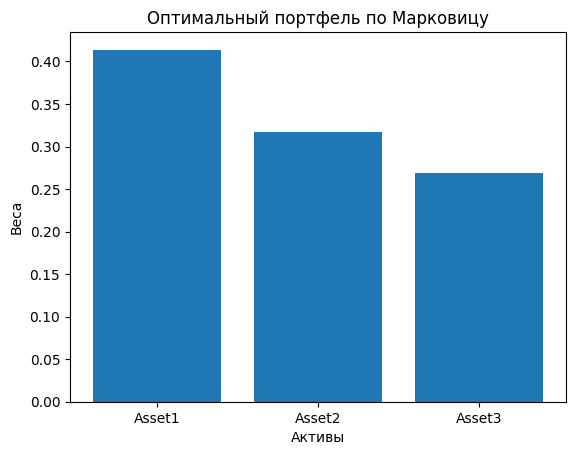

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Пример данных о доходностях акций
data = pd.DataFrame({
    'Asset1': [0.1, 0.2, 0.15, 0.05, 0.12],
    'Asset2': [0.2, 0.1, 0.05, 0.1, 0.3],
    'Asset3': [0.15, 0.3, 0.2, 0.2, 0.1]
})

# Вычисление средней доходности и ковариационной матрицы
mean_returns = data.mean()
cov_matrix = data.cov()

# Функция для вычисления доходности портфеля
def portfolio_return(weights, mean_returns):
    return np.dot(weights, mean_returns)

# Функция для вычисления риска (волатильности) портфеля
def portfolio_volatility(weights, cov_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# Функция целевой оптимизации — минимизация риска
def objective_function(weights, mean_returns, cov_matrix, target_return):
    return portfolio_volatility(weights, cov_matrix)

# Ограничение: сумма весов активов = 1 (полное распределение капитала)
def constraint_sum_weights(weights):
    return np.sum(weights) - 1

# Ограничение: доходность портфеля >= целевой доходности
def constraint_return(weights, mean_returns, target_return):
    return portfolio_return(weights, mean_returns) - target_return

# Начальные веса
num_assets = len(mean_returns)
initial_weights = np.ones(num_assets) / num_assets

# Целевая доходность
target_return = 0.15

# Ограничения для оптимизации
constraints = (
    {'type': 'eq', 'fun': constraint_sum_weights}, # сумма весов = 1
    {'type': 'eq', 'fun': constraint_return, 'args': (mean_returns, target_return)} # целевая доходность
)

# Границы для весов (все веса активов >= 0)
bounds = tuple((0, 1) for asset in range(num_assets))

# Оптимизация с минимизацией риска
optimal_portfolio = minimize(
    objective_function, 
    initial_weights, 
    args=(mean_returns, cov_matrix, target_return), 
    method='SLSQP', 
    bounds=bounds, 
    constraints=constraints
)

# Оптимальные веса
optimal_weights = optimal_portfolio.x

# Результаты
print("Оптимальные веса активов в портфеле:", optimal_weights)
print("Ожидаемая доходность портфеля:", portfolio_return(optimal_weights, mean_returns))
print("Риск портфеля (волатильность):", portfolio_volatility(optimal_weights, cov_matrix))

# Построение графика оптимального портфеля
plt.bar(data.columns, optimal_weights)
plt.xlabel('Активы')
plt.ylabel('Веса')
plt.title('Оптимальный портфель по Марковицу')
plt.show()


## Оптимизация плана производства ##

Модель оптимизации плана производства при ограниченных ресурсах — это задача математической оптимизации, которая решает проблему наилучшего распределения ограниченных ресурсов между разными видами продукции или проектами, чтобы максимизировать прибыль или минимизировать затраты. Данная модель широко используется в операционном менеджменте, планировании производства, логистике и управлении цепочками поставок.

### Основная суть модели:
Задача состоит в том, чтобы при наличии ограниченного количества ресурсов (например, сырья, трудовых ресурсов, времени, производственных мощностей) определить оптимальный объем производства различных видов продукции, который максимизирует прибыль (или минимизирует затраты), не превышая доступных ресурсов.

Математически такая задача обычно формулируется как задача линейного программирования.

### Основные элементы модели:

1. **Целевая функция**:
   - Это выражение, которое нужно оптимизировать (максимизировать или минимизировать). В производственной задаче целевая функция часто представляет собой **прибыль** или **сумму издержек**.

2. **Ограничения**:
   - Это набор условий, которые ограничивают возможные решения. Эти ограничения обычно связаны с доступностью ресурсов (например, сырья, времени или трудовых ресурсов) или ограничениями по производственным мощностям.

3. **Переменные**:
   - Переменные, которые мы пытаемся оптимизировать. Это могут быть, например, объемы производства каждой продукции, использование ресурсов и т.д.

### Пример задачи оптимизации:

Предположим, что компания производит два вида продукции: Продукт A и Продукт B. Каждый продукт требует двух видов ресурсов: сырья и времени рабочих. Компания хочет максимизировать прибыль, но она ограничена доступностью ресурсов.

#### Данные:

- **Продукт A**:
  - Прибыль: 50 у.е. за единицу.
  - Требует 2 единицы сырья и 3 часа рабочего времени на производство одной единицы.
  
- **Продукт B**:
  - Прибыль: 30 у.е. за единицу.
  - Требует 1 единицу сырья и 1 час рабочего времени на производство одной единицы.

- Общий доступный объем ресурсов:
  - Сырье: 100 единиц.
  - Время рабочих: 120 часов.

#### Задача:
Нужно определить, сколько единиц продукта A и продукта B нужно произвести, чтобы максимизировать прибыль при ограничениях на сырье и рабочее время.

### Математическая формулировка:

1. **Переменные**:
   - $x_1$ — количество произведенных единиц продукта A,
   - $x_2$ — количество произведенных единиц продукта B.

2. **Целевая функция** (максимизация прибыли):
   $$
   \text{Максимизировать:} \quad Z = 50x_1 + 30x_2
   $$
   где $Z$ — общая прибыль.

3. **Ограничения**:
   - Ограничение по сырью:
     $$
     2x_1 + x_2 \leq 100
     $$
   - Ограничение по рабочему времени:
     $$
     3x_1 + x_2 \leq 120
     $$
   - Ограничение неотрицательности:
     $$
     x_1 \geq 0, \quad x_2 \geq 0
     $$

### Решение задачи методом линейного программирования:

Для решения таких задач обычно используются численные методы оптимизации, такие как **симплекс-метод**. В Python эту задачу можно решить с помощью библиотеки `scipy` или `pulp`, которые предназначены для линейного программирования.

### Результат:

Допустим, решение покажет, что:

- Оптимальный объем производства продукта A = 20 единиц,
- Оптимальный объем производства продукта B = 60 единиц,
- Максимальная прибыль составит 2700 у.е.

### Интерпретация:

- Компании нужно произвести 20 единиц продукта A и 60 единиц продукта B для максимизации прибыли при данных ограничениях на ресурсы.
- Эти объемы производства полностью используют доступные ресурсы (100 единиц сырья и 120 часов рабочего времени).

### Дополнительные возможности модели:

1. **Анализ чувствительности**:
   - Модель позволяет анализировать, как изменения в доступности ресурсов или прибыли влияют на оптимальное решение. Например, можно выяснить, как увеличится прибыль, если увеличить доступные рабочие часы или сырье.

2. **Многоэтапное планирование**:
   - Модель может быть расширена для многопериодных задач, где ресурсы и спрос варьируются по времени.

3. **Целевая функция может меняться**:
   - В некоторых случаях целевой функцией может быть не максимизация прибыли, а минимизация затрат или оптимизация использования ресурсов.

### Применение модели:

- **Управление производственными мощностями**: Определение, сколько производственных мощностей нужно выделить для каждой продукции, чтобы достичь наилучшего результата.
- **Планирование производства**: Оптимизация производственного процесса с учетом доступности оборудования и рабочей силы.
- **Складское и ресурсное планирование**: Определение оптимальных запасов сырья для снижения затрат.
- **Логистика и транспортировка**: Оптимизация маршрутов и грузоперевозок при ограниченных ресурсах, таких как топливо или транспортные средства.

### Заключение:

Модель оптимизации плана производства при ограниченных ресурсах является важным инструментом для компаний, позволяющим эффективно распределять ресурсы, минимизировать издержки и максимизировать прибыль. Использование линейного программирования делает такие задачи решаемыми с помощью численных методов, что значительно облегчает принятие оптимальных управленческих решений.

In [39]:
from scipy.optimize import linprog

# Коэффициенты целевой функции (минус для максимизации)
c = [-50, -30]

# Коэффициенты ограничений (левая часть матриц для сырья и времени)
A = [[2, 1],  # Ограничение по сырью
     [3, 2]]  # Ограничение по времени

# Правые части ограничений
b = [100, 120]

# Границы переменных (они не могут быть отрицательными)
x_bounds = (0, None)
bounds = [x_bounds, x_bounds]

# Решение задачи
result = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs')

# Результаты
if result.success:
    print(f"Оптимальный объем производства продукта A: {result.x[0]}")
    print(f"Оптимальный объем производства продукта B: {result.x[1]}")
    print(f"Максимальная прибыль: {-result.fun}")
else:
    print("Задачу не удалось решить")

Оптимальный объем производства продукта A: 40.0
Оптимальный объем производства продукта B: 0.0
Максимальная прибыль: 2000.0


## Модель Леонтьева ##

Модель "затраты-выпуск" (или модель Леонтьева) — это экономическая модель, разработанная Василием Леонтьевым для описания взаимосвязей между различными секторами экономики. Она показывает, как продукция одного сектора используется другими секторами в качестве ресурса или промежуточного товара, и как изменения в одном секторе могут повлиять на остальные сектора экономики. Модель помогает анализировать взаимозависимости между производителями и потребителями внутри экономики и широко используется для планирования и анализа экономической политики.

### Основные компоненты модели:

1. **Матрица затрат-выпуска** (или матрица межотраслевых балансов) показывает, сколько ресурсов от каждого сектора требуется для производства единицы продукции другого сектора.
   
2. **Вектор конечного спроса** представляет объемы спроса на продукцию каждого сектора со стороны конечных потребителей (домохозяйства, экспорт и т.д.).

3. **Вектор выпуска** показывает, сколько продукции каждый сектор должен произвести для удовлетворения спроса как других секторов (промежуточный спрос), так и конечных потребителей (конечный спрос).

### Математическая формализация:

Модель "затраты-выпуск" может быть представлена следующими уравнениями:

$$
x = Ax + d
$$

где:
- $x$ — вектор общего выпуска секторов экономики (сколько продукции должен произвести каждый сектор),
- $A$ — матрица коэффициентов затрат (межотраслевые взаимозависимости),
- $d$ — вектор конечного спроса,
- $Ax$ — промежуточный спрос, то есть продукция, которую один сектор использует для производства своей продукции.

Перепишем это уравнение:

$$
x - Ax = d \quad \text{или} \quad (I - A)x = d
$$

где $I$ — единичная матрица. Чтобы найти вектор выпуска $x$, решаем уравнение:

$$
x = (I - A)^{-1} d
$$

Матрица $(I - A)^{-1}$ называется матрицей Леонтьева и показывает, как изменение спроса влияет на выпуск всех секторов.

### Пример модели:

Рассмотрим упрощенную экономику с двумя секторами: сельское хозяйство (A) и промышленность (B). Пусть нам известна следующая информация:

- Для производства 1 единицы продукции сельского хозяйства требуется 0.3 единицы продукции промышленности и 0.4 единицы продукции сельского хозяйства.
- Для производства 1 единицы продукции промышленности требуется 0.5 единицы продукции сельского хозяйства и 0.2 единицы промышленной продукции.

Также известен конечный спрос:
- Конечный спрос на продукцию сельского хозяйства = 100 единиц.
- Конечный спрос на продукцию промышленности = 150 единиц.

### 1. Построение матрицы затрат-выпуска:

На основе приведенных данных можно составить матрицу $A$ для двух секторов:

$$
A = \begin{pmatrix}
0.4 & 0.3 \\
0.5 & 0.2
\end{pmatrix}
$$

где:
- $0.4$ — доля продукции сельского хозяйства, используемая в сельском хозяйстве,
- $0.3$ — доля продукции промышленности, используемая в сельском хозяйстве,
- $0.5$ — доля продукции сельского хозяйства, используемая в промышленности,
- $0.2$ — доля продукции промышленности, используемая в промышленности.

### 2. Вектор конечного спроса:

$$
d = \begin{pmatrix}
100 \\
150
\end{pmatrix}
$$

### 3. Решение уравнения:

Для определения объема выпуска секторов $x$, нужно найти:

$$
x = (I - A)^{-1} d
$$

Где $I$ — единичная матрица:

$$
I = \begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix}
$$

$$
I - A = \begin{pmatrix}
1 - 0.4 & 0 - 0.3 \\
0 - 0.5 & 1 - 0.2
\end{pmatrix}
= \begin{pmatrix}
0.6 & -0.3 \\
-0.5 & 0.8
\end{pmatrix}
$$

Теперь найдём обратную матрицу $(I - A)^{-1}$. Для матрицы $2 \times 2$ обратная матрица вычисляется по формуле:

$$
(I - A)^{-1} = \frac{1}{det(I - A)} \cdot \begin{pmatrix}
a_{22} & -a_{12} \\
-a_{21} & a_{11}
\end{pmatrix}
$$

где $det(I - A)$ — определитель матрицы:

$$
det(I - A) = (0.6 \times 0.8) - (-0.3 \times -0.5) = 0.48 - 0.15 = 0.33
$$

Теперь находим обратную матрицу:

$$
(I - A)^{-1} = \frac{1}{0.33} \cdot \begin{pmatrix}
0.8 & 0.3 \\
0.5 & 0.6
\end{pmatrix}
= \begin{pmatrix}
2.424 & 0.909 \\
1.515 & 1.818
\end{pmatrix}
$$

### 4. Расчет выпуска:

Теперь умножим обратную матрицу на вектор спроса:

$$
x = \begin{pmatrix}
2.424 & 0.909 \\
1.515 & 1.818
\end{pmatrix}
\cdot
\begin{pmatrix}
100 \\
150
\end{pmatrix}
= \begin{pmatrix}
2.424 \times 100 + 0.909 \times 150 \\
1.515 \times 100 + 1.818 \times 150
\end{pmatrix}
= \begin{pmatrix}
363.85 \\
454.2
\end{pmatrix}
$$

Таким образом, для удовлетворения конечного спроса в 100 единиц продукции сельского хозяйства и 150 единиц продукции промышленности, экономика должна произвести:
- 363.85 единиц продукции сельского хозяйства,
- 454.2 единиц продукции промышленности.

### Заключение:

Модель "затраты-выпуск" помогает оценить, как изменения спроса в одном секторе влияют на другие сектора экономики. Она широко используется в макроэкономике для анализа экономической политики, планирования производства, оценки последствий экономических шоков и разработки стратегий роста.

## Теория игр ##

Теория игр — это математический метод анализа стратегического взаимодействия между участниками, когда результат для каждого зависит от действий всех участников. В экономике она используется для анализа конкуренции, сотрудничества, переговоров и других форм взаимодействий.

### Пример **"Дилемма заключенного"**

**"Дилемма заключенного"** — это классическая игра, которая иллюстрирует, как два рациональных участника могут не прийти к оптимальному результату, если каждый действует в своих интересах. Этот пример используется для анализа конкурентных стратегий в бизнесе, вопросов сотрудничества, конфликтов и переговоров.

#### Суть "Дилеммы заключённого":
Два преступника, А и B, были пойманы и обвиняются в совершении преступления. Они сидят в разных камерах и не могут общаться друг с другом. Им предложено следующее:

1. Если один из них предаст другого (сотрудничает с полицией, предоставив доказательства против партнера), а другой останется верен (молчит), то предавший получит свободу, а второй получит максимальный срок (10 лет).
2. Если оба предадут друг друга, каждый получит по 5 лет тюрьмы.
3. Если оба молчат, они получат минимальный срок — 2 года каждый, так как полиция не имеет достаточно доказательств.

#### Матрица выигрышей:

|               | B молчит        | B предаёт       |
|---------------|-----------------|-----------------|
| **A молчит**  | (−2, −2)        | (−10, 0)        |
| **A предаёт** | (0, −10)        | (−5, −5)        |

- Если оба молчат, они оба получат по 2 года тюрьмы.
- Если один предает, а другой молчит, предатель выйдет на свободу, а молчавший получит 10 лет.
- Если оба предадут друг друга, они получат по 5 лет тюрьмы.

#### Анализ с точки зрения теории игр:

1. **Нэш equilibrium (Равновесие Нэша)**: 
   В этой игре **равновесие Нэша** достигается, когда оба игрока предают друг друга. Это состояние, в котором ни один игрок не может улучшить свой результат, изменив свою стратегию, если другой игрок остается верен своей стратегии. В данном случае, если один игрок решает молчать, другой может улучшить свой результат, предав. Поэтому оба в итоге выберут предательство.

2. **Доминирующая стратегия**:
   В этой игре у каждого игрока есть **доминирующая стратегия** — стратегия, которая приносит лучший результат вне зависимости от того, что делает другой игрок. Здесь предательство — это доминирующая стратегия для обоих. Предать выгоднее, если другой молчит (получаешь свободу), и предать также выгоднее, если другой предает (получаешь 5 лет вместо 10).

3. **Социально оптимальный результат**:
   Однако, если бы оба игрока молчали, они бы получили только по 2 года тюрьмы, что было бы лучше для обоих, чем 5 лет тюрьмы, которые они получат, предав друг друга. Это иллюстрирует дилемму: следуя своему рациональному интересу, оба игрока приходят к худшему результату для себя, чем если бы они сотрудничали.

### Применение в экономике:

"Дилемма заключенного" используется для объяснения многих явлений в экономике и бизнесе, особенно в ситуациях, когда две или более стороны сталкиваются с выбором между сотрудничеством и конкуренцией:

1. **Конкуренция между фирмами**:
   - Например, если две компании производят похожие товары, они могут сотрудничать (например, не снижать цены) или конкурировать (снижать цены). Если обе компании снижают цены, они уменьшают свою прибыль (равновесие Нэша), хотя им было бы лучше сотрудничать и держать цены высокими. Но каждая компания боится, что другая снизит цены первой.

2. **Олигополия**:
   - В олигополистическом рынке несколько крупных компаний могут контролировать цены на товары. Они могут либо сотрудничать (сохраняя высокие цены), либо пытаться увеличить свою долю на рынке за счет снижения цен. Как в "Дилемме заключённого", все фирмы выигрывают от сотрудничества, но существует соблазн разрушить это сотрудничество для краткосрочной выгоды.

3. **Картели**:
   - Дилемма часто используется для анализа поведения картелей, таких как ОПЕК. Члены картеля могут сотрудничать (согласовывать уровни добычи нефти для поддержания цен) или нарушать соглашения, увеличивая добычу для получения дополнительной прибыли. Однако, если все страны-участницы начнут нарушать соглашения, цены на нефть упадут, и в итоге все окажутся в проигрыше.

4. **Общественные блага и природные ресурсы**:
   - Проблема эксплуатации общих ресурсов, таких как рыболовные запасы или природные ресурсы, также может рассматриваться через призму "Дилеммы заключённого". Рациональные агенты (например, рыбаки) могут чрезмерно использовать ресурсы, несмотря на то, что это ведет к ухудшению состояния ресурса в долгосрочной перспективе, из-за недоверия к тому, что другие участники будут соблюдать правила.

### Заключение:

"Дилемма заключенного" — это важный пример из теории игр, который показывает, как индивидуальные интересы могут приводить к неэффективным коллективным результатам. В экономике этот пример помогает понять, почему фирмы или страны могут действовать против общего блага, и подчеркивает необходимость механизмов сотрудничества, таких как соглашения или государственные интервенции, чтобы преодолеть такие дилеммы.

Другим популярным примером из теории игр является **игра "Охота на оленя"** (также известная как **"Игра Стага"**). Этот сценарий описывает ситуацию, где два игрока могут сотрудничать для достижения лучшего результата или действовать в одиночку, что может принести каждому меньшую выгоду, но и снизить риск.

### Описание "Охоты на оленя":

Представим двух охотников, которые могут совместно охотиться на оленя или охотиться по отдельности на зайцев. Охота на оленя требует сотрудничества обоих охотников: один не сможет поймать оленя в одиночку. Если они сотрудничают, то оба получат большую награду — оленя. Но каждый охотник также может решить охотиться на зайца в одиночку, что принесет меньшую награду, но это гарантированный результат.

#### Выигрыши:
1. **Если оба охотятся на оленя**: они делят добычу, и каждый получает хорошую награду (например, 10 единиц пищи).
2. **Если один охотится на оленя, а другой на зайца**: охотник, выбравший зайца, гарантированно получит зайца (например, 5 единиц пищи), а тот, кто выбрал оленя, останется ни с чем (0 единиц пищи).
3. **Если оба охотятся на зайцев**: каждый получает по зайцу (5 единиц пищи).

### Матрица выигрышей:

|               | Второй охотится на оленя | Второй охотится на зайца |
|---------------|--------------------------|--------------------------|
| **Первый охотится на оленя** | (10, 10)                     | (0, 5)                      |
| **Первый охотится на зайца**  | (5, 0)                      | (5, 5)                      |

- Если оба охотника охотятся на оленя, они получают максимальный выигрыш: по 10 единиц.
- Если один охотится на зайца, он получает 5 единиц, а другой, пытавшийся поймать оленя, не получает ничего.
- Если оба охотятся на зайца, каждый получает 5 единиц пищи.

### Анализ с точки зрения теории игр:

1. **Равновесие Нэша**:
   - В этой игре существуют **два равновесия Нэша**:
     1. Оба охотятся на оленя (10, 10).
     2. Оба охотятся на зайца (5, 5).
   
   Оба этих исхода являются устойчивыми: если один игрок решит изменить свою стратегию, другой игрок останется верен своей стратегии, и это не принесет выгоды.

2. **Доминирующей стратегии нет**:
   - В этой игре нет явной доминирующей стратегии, как в "Дилемме заключённого". Каждая стратегия может быть выгодной в зависимости от действий другого игрока. Если другой игрок охотится на оленя, лучшей стратегией будет охота на оленя. Если другой охотится на зайца, охота на зайца также является разумным выбором.

3. **Проблема доверия**:
   - Основная дилемма заключается в том, что сотрудничество (охота на оленя) может принести больший выигрыш, но требует доверия. Если один из охотников сомневается в том, что другой будет сотрудничать, он предпочтет охотиться на зайца, чтобы гарантировать хотя бы небольшой выигрыш.
   
   Этот пример иллюстрирует ситуацию, в которой обе стороны могут выиграть больше через сотрудничество, но риск потери может заставить их выбрать менее выгодную, но безопасную стратегию.

### Применение в экономике:

1. **Координация действий между компаниями**:
   - Допустим, две компании могут вместе разработать инновационный продукт, но каждая боится, что другая не выполнит свою часть работы или получит большую выгоду от сотрудничества. В результате они могут предпочесть работать по отдельности над менее инновационными проектами с меньшим доходом.

2. **Инвестиции в инфраструктуру**:
   - Два региона могут совместно финансировать строительство моста, который будет выгоден обоим, но если один регион решит не вкладывать деньги, другой останется с убытками. Таким образом, если один регион сомневается в партнере, он может предпочесть реализовать менее эффективный проект на своей стороне.

3. **Международные договоры**:
   - Две страны могут договориться о сокращении выбросов углекислого газа. Если они сотрудничают, обе стороны выигрывают благодаря улучшению экологии. Но каждая страна может опасаться, что другая не выполнит своих обязательств и, таким образом, предпочтет не сокращать выбросы, чтобы избежать экономических потерь, несмотря на ухудшение экологической ситуации.

### Важные моменты:

- В отличие от "Дилеммы заключённого", где предательство является доминирующей стратегией, в "Охоте на оленя" успех зависит от координации и доверия между игроками. Оба игрока должны быть уверены в сотрудничестве, чтобы получить максимальный выигрыш.
- Эта игра подчеркивает важность доверия и согласованных действий в ситуациях, где выгода от сотрудничества выше, чем при индивидуальных действиях.

### Заключение:

"Охота на оленя" — это игра, которая демонстрирует необходимость координации и доверия для достижения наилучшего результата. В реальных экономических ситуациях этот пример часто применяется для анализа кооперации между фирмами, правительствами или странами в контексте совместных проектов и инициатив.

**Тройная дуэль** (или «Тройная перестрелка») — это классическая игра из теории игр, в которой участвуют три игрока, каждый из которых имеет оружие и пытается выжить, устранив других участников. В этой игре важно не только меткость стрельбы, но и стратегия выбора действий в зависимости от вероятностей успеха других участников.

### Основные условия игры:

1. **Три игрока**: $A$, $B$ и $C$.
2. У каждого игрока разные шансы попасть в цель:
   - Игрок $A$ — наименее меткий, его вероятность попадания = 1/3.
   - Игрок $B$ — средний по меткости, его вероятность попадания = 2/3.
   - Игрок $C$ — самый меткий, его вероятность попадания = 1 (100%).

3. Игра происходит пошагово. Каждый игрок по очереди стреляет в одного из оставшихся участников. Цель каждого игрока — выжить, устранив соперников.

### Важные моменты:

- Если все три игрока стреляют по лучшему стрелку или действуют без стратегии, вероятность выжить может зависеть только от случайности.
- Однако если каждый участник рационален, их действия зависят от вероятностей попадания и ситуации на каждом этапе игры.

### Стратегии игры:

1. **Игрок $A$**, зная, что он самый слабый стрелок, может прибегнуть к стратегии пропуска выстрела на первом ходу. Это делается для того, чтобы $B$ и $C$ попытались устранить друг друга. У игрока $A$ появляется шанс на выживание, если более меткие соперники вступят в дуэль между собой.

2. **Игрок $B$** осознает, что игрок $C$ — его основной конкурент, так как $C$ более меткий. В такой ситуации $B$ вероятно постарается устранить игрока $C$ на своем ходу.

3. **Игрок $C$**, будучи самым метким стрелком, является главной угрозой для остальных. $C$ знает, что $A$ и $B$ будут стремиться избавиться от него в первую очередь. Поэтому $C$ может принять стратегию нападения первым на самого опасного конкурента, то есть на игрока $B$, который является следующим по силе.

### Вероятности и рациональное поведение:

- **Игрок $A$**, понимая, что у него самый низкий шанс победить в прямом столкновении, может выбрать не стрелять вообще на первом ходу. Это связано с тем, что если $A$ выстрелит и не попадет, то игроки $B$ и $C$ обратят внимание на него. Пропуская ход, $A$ может избежать попадания под удар, пока $B$ и $C$ сражаются друг с другом.

- **Игрок $B$** осознает, что лучше всего ему сосредоточиться на устранении игрока $C$, так как $C$ является наиболее опасным из-за своей меткости. Устранение игрока $C$ даст $B$ и $A$ шанс сразиться друг с другом, при этом $B$ будет иметь преимущество перед менее метким игроком $A$.

- **Игрок $C$** понимает, что является главной целью для обоих остальных игроков, и будет стремиться избавиться от игрока $B$, поскольку $B$ более опасен по сравнению с $A$. После этого $C$, обладая меткостью, может с легкостью победить игрока $A$.

### Пример:

Рассмотрим возможное развитие событий:

1. **Ход $A$**: Игрок $A$ понимает, что его вероятность попасть низка. Он решает пропустить выстрел, чтобы избежать внимания со стороны $B$ и $C$.

2. **Ход $B$**: Игрок $B$ стреляет в игрока $C$, так как это наиболее опасный соперник. Допустим, $B$ попадает и убивает игрока $C$.

3. **Ход $A$**: Теперь игроки $A$ и $B$ остались вдвоем. $A$ стреляет в $B$, но вероятность попадания составляет 1/3. Если $A$ не попадает, $B$ стреляет в ответ, и с вероятностью 2/3 убивает $A$.

### Вероятности выигрыша:

1. **Игрок $C$**, как наиболее меткий стрелок, является наибольшей угрозой, но также и первой целью для других. Его стратегия — устранять самого опасного соперника. Однако, если его сразу атакуют два игрока, его шансы могут снизиться.

2. **Игрок $B$** имеет хорошие шансы победить, если он успеет устранить $C$ и затем сразиться с $A$. Его стратегия — стрелять в $C$, если $A$ пассивен.

3. **Игрок $A$**, будучи самым слабым, выиграет, только если $B$ и $C$ уничтожат друг друга, или если $B$ промахнется. Пропуск выстрела в начале — наиболее рациональная стратегия, так как позволяет остаться в игре и не быть целью сразу.

### Применение в экономике:

Тройная дуэль может применяться в различных экономических контекстах, где участвуют три игрока или компании, стремящиеся выжить в условиях конкуренции, таких как:
- **Олигополия**: Три компании конкурируют на рынке, и каждая должна выбрать стратегию взаимодействия с двумя другими. Например, они могут агрессивно снижать цены (стрелять друг в друга) или вести осторожную политику (пропускать ход).
- **Конкуренция за ресурсы**: Когда три фирмы конкурируют за ограниченный ресурс, стратегия минимизации прямой конфронтации и игра на противоречиях между другими участниками может принести наибольшую выгоду.

### Заключение:

Тройная дуэль — это пример игры, в которой важна не только индивидуальная сила (вероятность попадания), но и стратегия взаимодействия с другими игроками. Каждый игрок должен принимать во внимание действия своих соперников и оптимизировать свои ходы для увеличения шансов на выживание и победу.

**Минимаксная стратегия** — это ключевая концепция в теории игр, особенно в матричных играх с нулевой суммой, где интересы игроков полностью противоположны. Основная идея заключается в том, что каждый игрок старается минимизировать максимальный возможный ущерб, исходя из того, что другой игрок действует рационально и стремится максимизировать свою выгоду.

### Матричная игра с нулевой суммой

В игре с нулевой суммой выигрыш одного игрока равен проигрышу другого. Например, если один игрок выигрывает 10 единиц, то другой теряет 10 единиц. Рассмотрим матричную игру, в которой есть два игрока: $A$ и $B$, и для каждого из них есть набор стратегий.

#### Пример матрицы игры для игрока $A$:
$$
\begin{pmatrix}
3 & -2 & 1 \\
-1 & 4 & -3 \\
2 & -3 & 0
\end{pmatrix}
$$
Эта матрица представляет выигрыш игрока $A$ при различных комбинациях стратегий обоих игроков. Столбцы представляют стратегии игрока $B$, а строки — стратегии игрока $A$.

### Шаги для минимаксной стратегии:

1. **Для игрока $A$ (минимизация максимальных потерь)**:
   - Игрок $A$ хочет выбрать такую стратегию, которая минимизирует его максимальные потери.
   - Для каждой строки (стратегии игрока $A$) он находит **минимальный** элемент (наихудший результат).
   - Затем игрок $A$ выбирает ту строку, где этот минимальный элемент является наибольшим из всех минимальных элементов. Это называется **максимин**.

2. **Для игрока $B$ (максимизация минимальных выигрышей)**:
   - Игрок $B$, напротив, пытается максимизировать свои выигрыши (или минимизировать потери $A$).
   - Для каждой колонки (стратегии игрока $B$) он находит **максимальный** элемент (наилучший результат).
   - Затем игрок $B$ выбирает ту колонку, где этот максимальный элемент является наименьшим среди всех максимальных элементов. Это называется **минимакс**.

### Минимаксная стратегия в действии:

Рассмотрим, как игроки $A$ и $B$ выбирают свои стратегии в матричной игре.

#### Игрок $A$:
1. В первой строке: минимальный элемент = $-2$.
2. Во второй строке: минимальный элемент = $-3$.
3. В третьей строке: минимальный элемент = $-3$.

Из этих минимальных элементов игрок $A$ выберет наибольший, то есть $-2$. Это значит, что оптимальная стратегия для игрока $A$ — выбрать первую строку, так как даже при худшем сценарии его проигрыш будет не меньше $-2$.

#### Игрок $B$:
1. В первом столбце: максимальный элемент = $3$.
2. Во втором столбце: максимальный элемент = $4$.
3. В третьем столбце: максимальный элемент = $1$.

Из этих максимальных элементов игрок $B$ выберет наименьший, то есть $1$. Это значит, что оптимальная стратегия для игрока $B$ — выбрать третий столбец, так как это минимизирует его потери.

### Суть минимаксной стратегии:

- **Игрок $A$** пытается выбрать стратегию, которая минимизирует его максимальные возможные потери.
- **Игрок $B$** пытается выбрать стратегию, которая максимизирует его минимальные выигрыши (или минимизирует выигрыш $A$).

Минимаксная стратегия — это состояние игры, при котором каждый игрок делает наилучший выбор, исходя из того, что другой игрок действует рационально и выбирает наилучшее для себя. В равновесии, когда оба игрока играют минимаксные стратегии, ни один из них не может улучшить свой результат, изменив стратегию.

### Пример:

Рассмотрим игру, в которой два игрока выбирают свои стратегии в матричной игре с нулевой суммой. Пусть игрок $A$ может выбрать между стратегиями $A_1$, $A_2$, $A_3$, а игрок $B$ — между стратегиями $B_1$, $B_2$, $B_3$.

Игрок $A$ выбирает стратегию $A_1$, зная, что его максимальный возможный проигрыш составит $-2$. Игрок $B$, в свою очередь, выбирает стратегию $B_3$, при которой он минимизирует максимальный выигрыш игрока $A$.

Таким образом, минимаксная стратегия позволяет каждому игроку защитить себя от наихудших исходов в игре.

### Заключение:

Минимаксная стратегия важна в теории игр, так как она приводит игроков к равновесию, где никто не может улучшить свою позицию, изменив стратегию. Она применяется не только в экономике, но и в других областях, например, в политике, спорте, военных стратегиях и даже в компьютерных играх.

## Примеры матричных игр ##

$$
\left(
\begin{array}{cccc}
10 & -3 & 0 & 4\\
0 & 5 & 0 & 4\\
2 & 0 & -5 & 6\\
-1 & 4 & -2 & -4
\end{array}
\right)
$$